# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writting algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-06-29 08:49:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.128, 209.85.234.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  95.4MB/s    in 1.1s    

2023-06-29 08:49:52 (95.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

A very crucial step at the begining of any machine learning project is becoming one with the data.
And for computer vision project... this usually means visualizing many samples of our data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

# walkthrough pizza steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize images, first let's get the class programtically


In [ ]:
# get the class names programtically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names= np.array(sorted([item.name for item in data_dir.glob("*")]))# create a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# let's visualize the image
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
  # setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # get a random image
  random_image = random.sample(os.listdir(target_folder),1)

  # read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") #show the shape of image

  return img

Image shape: (512, 512, 3)


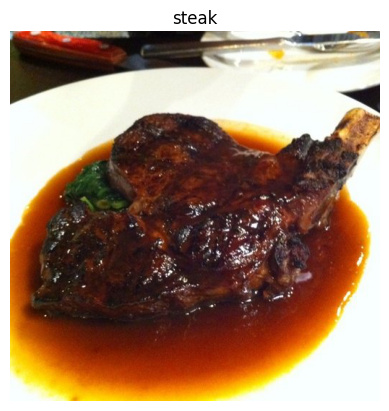

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

## An end-to-end example
Let's build a convolutional neural network to find patterns in our images, more specifically:
* Load the images data
* Preprocess the images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess data(get all of the pixels values between 0 and 1 , also called scaling or normalizing the data)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup paths to data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size=32,
                                               target_size= (224,224),
                                               class_mode="binary",
                                               seed=42)

# build a CNN model(same as tiny vgg on the cnn explainer website)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation ="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation ="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the cnn
model_1.compile(
    loss="binary_crossentropy",
    optimizer = "adam",
    metrics= ["accuracy"]
)

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data)
                        ,validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 17s 297ms/step - loss: 0.5643 - accuracy: 0.7180 - val_loss: 0.4110 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 11s 237ms/step - loss: 0.4398 - accuracy: 0.8073 - val_loss: 0.3912 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 11s 234ms/step - loss: 0.4165 - accuracy: 0.8107 - val_loss: 0.3705 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 11s 234ms/step - loss: 0.4127 - accuracy: 0.8213 - val_loss: 0.3774 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 11s 236ms/step - loss: 0.3356 - accuracy: 0.8593 - val_loss: 0.3885 - val_accuracy: 0.8200


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the model as before

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
    ])

model_2.compile (loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 226ms/step - loss: 1.0298 - accuracy: 0.5113 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 261ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 11s 229ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 218ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_7 (Dense)             (None, 4)                 602116    
                                                                 
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model 3 increasing layers of model 2
# set random seed
tf.random.set_seed(42)

# create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(1, activation ="sigmoid")
])

# compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer="adam",
    metrics=["accuracy"]
)

# fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data= valid_data,
                        validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 220ms/step - loss: 3.7936 - accuracy: 0.6107 - val_loss: 0.6294 - val_accuracy: 0.6880
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 0.7459 - accuracy: 0.6927 - val_loss: 0.9942 - val_accuracy: 0.6300
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 0.7718 - accuracy: 0.6953 - val_loss: 0.8598 - val_accuracy: 0.6460
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.6475 - accuracy: 0.7413 - val_loss: 0.4671 - val_accuracy: 0.7740
Epoch 5/5
47/47 [==============================] - 10s 220ms/step - loss: 0.5061 - accuracy: 0.7607 - val_loss: 0.4763 - val_accuracy: 0.7880


In [ ]:
# get a summary of model_3
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_14 (Dense)            (None, 100)               15052900  
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary classification : let's break it down

1. Become one with the data (visualize , visualize, visualize)
2. Preprocess the data (prepared it for our model , the main step here was scalling;/normalizing)
3. Create the model (start with baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model(try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)


### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 384, 3)


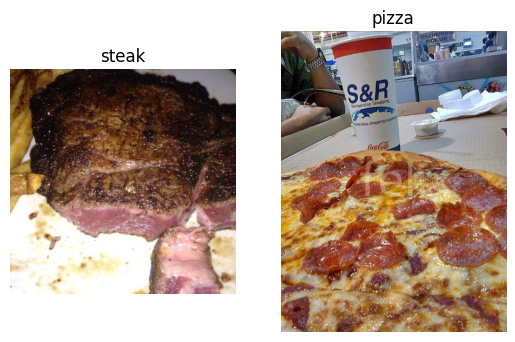

In [ ]:
# visualize data
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### Preprocess the data

In [ ]:
# define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

In [ ]:
!nvidia-smi

Thu Jun 29 08:50:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen =  ImageDataGenerator(rescale=1/255.)


In [ ]:
# load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size= (224,224),
                                               class_mode = "binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size= (224,224),
                                             class_mode= "binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# get a sample of train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# no. of batches
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# get the first two images
images[:2], images[0].shape

(array([[[[0.0627451 , 0.03137255, 0.01960784],
          [0.05882353, 0.02745098, 0.01568628],
          [0.05882353, 0.02745098, 0.01568628],
          ...,
          [0.31764707, 0.3647059 , 0.3254902 ],
          [0.36862746, 0.40784317, 0.37254903],
          [0.34901962, 0.37647063, 0.34901962]],
 
         [[0.04705883, 0.02745098, 0.01176471],
          [0.04705883, 0.02745098, 0.01176471],
          [0.04313726, 0.02352941, 0.00784314],
          ...,
          [0.4666667 , 0.50980395, 0.4784314 ],
          [0.4431373 , 0.48235297, 0.45098042],
          [0.44705886, 0.48235297, 0.46274513]],
 
         [[0.04313726, 0.02352941, 0.01176471],
          [0.03921569, 0.01960784, 0.00784314],
          [0.03921569, 0.01960784, 0.00784314],
          ...,
          [0.4039216 , 0.43921572, 0.41960788],
          [0.39607847, 0.43137258, 0.41960788],
          [0.67058825, 0.7058824 , 0.69411767]],
 
         ...,
 
         [[0.7803922 , 0.62352943, 0.42352945],
          [0.76078

In [ ]:
images[7]

array([[[0.09019608, 0.10588236, 0.10196079],
        [0.6039216 , 0.6313726 , 0.67058825],
        [0.61960787, 0.6509804 , 0.7411765 ],
        ...,
        [0.0509804 , 0.02352941, 0.        ],
        [0.04705883, 0.02745098, 0.00392157],
        [0.05882353, 0.03921569, 0.01568628]],

       [[0.02352941, 0.03921569, 0.08235294],
        [0.27450982, 0.29411766, 0.36862746],
        [0.62352943, 0.6509804 , 0.75294125],
        ...,
        [0.06666667, 0.03921569, 0.01568628],
        [0.05490196, 0.03529412, 0.01176471],
        [0.05882353, 0.03921569, 0.01568628]],

       [[0.11764707, 0.1254902 , 0.20784315],
        [0.627451  , 0.6509804 , 0.7372549 ],
        [0.65882355, 0.6901961 , 0.7803922 ],
        ...,
        [0.0627451 , 0.04313726, 0.01960784],
        [0.0509804 , 0.03137255, 0.00784314],
        [0.04313726, 0.03137255, 0.00392157]],

       ...,

       [[0.9725491 , 0.9960785 , 0.9568628 ],
        [0.9607844 , 0.9843138 , 0.97647065],
        [0.97647065, 0

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# view the first batch of labels
labels

array([0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)
A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline



In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten , Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# create the model(this will be baseline , a 3 layer cnn)
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)), # input layer (specify input shape)
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3 ,activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer(working with binary classification so only 1 output neuron)
])

# compile the model
model_4.compile(
    loss= "binary_crossentropy",
    metrics=["accuracy"],
    optimizer= Adam()
)

# fit the model
history_4 = model_4.fit(train_data,
                        steps_per_epoch=len(train_data),
                        epochs=5,
                        validation_data=test_data,
                        validation_steps= len(test_data),
                        batch_size=32)


Epoch 1/5
47/47 [==============================] - 104s 2s/step - loss: 1.9991 - accuracy: 0.5000 - val_loss: 0.6859 - val_accuracy: 0.5260
Epoch 2/5
47/47 [==============================] - 104s 2s/step - loss: 0.6232 - accuracy: 0.6013 - val_loss: 0.5598 - val_accuracy: 0.7100
Epoch 3/5
47/47 [==============================] - 121s 3s/step - loss: 0.5014 - accuracy: 0.7620 - val_loss: 0.5926 - val_accuracy: 0.7460
Epoch 4/5
47/47 [==============================] - 104s 2s/step - loss: 0.3957 - accuracy: 0.8447 - val_loss: 0.6342 - val_accuracy: 0.6900
Epoch 5/5
47/47 [==============================] - 109s 2s/step - loss: 0.2609 - accuracy: 0.9027 - val_loss: 0.7372 - val_accuracy: 0.7040


### 5. Evaluate the model

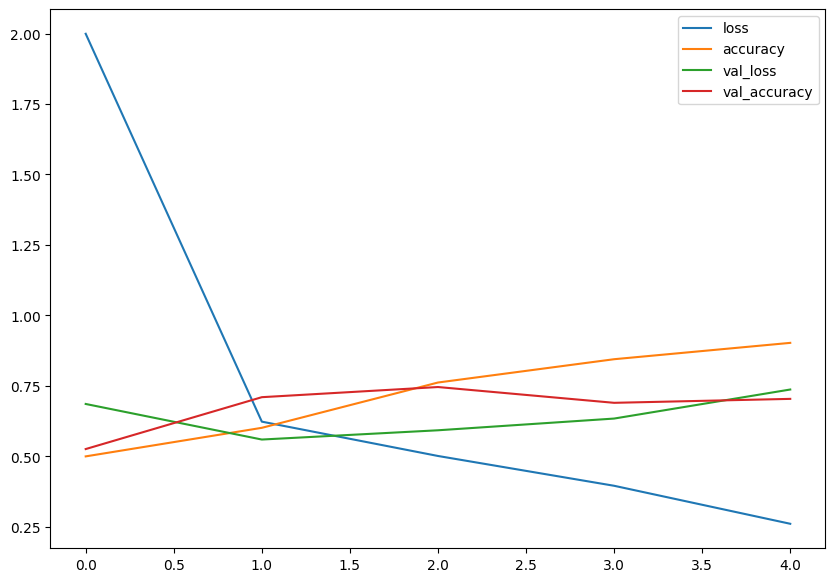

In [ ]:
# lets plot training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
# plot the validation and training curves separately
def plot_loss_curve(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss= history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs

  # plot loss
  plt.plot(epochs, loss,'bo', label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss" )
  plt.title("loss curve")
  plt.xlabel("epochs")
  plt.legend()

  # plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, 'bo',label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy curve")
  plt.xlabel("epochs")
  plt.legend()


**Note**: When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset too well and this the model's ability to generalize to unseen data will be diminshed.





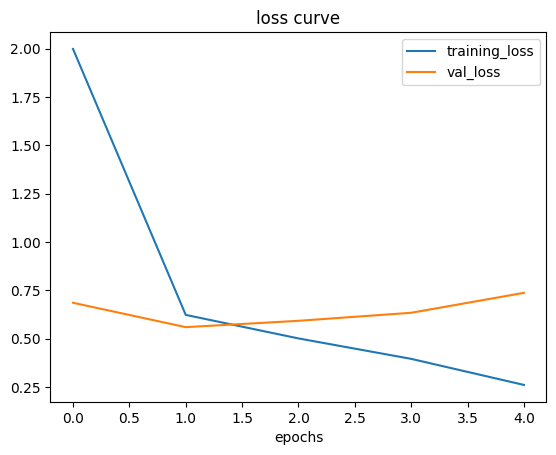

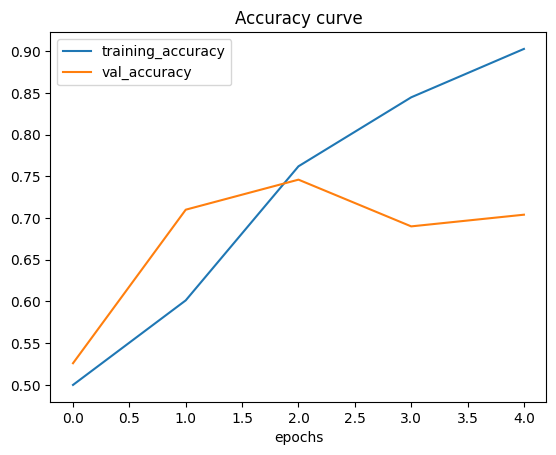

In [ ]:
# check out loss and accuracy curve
plot_loss_curve(history=history_4)

**Note**: Ideally the two loss curves(training and validation) will be very similar to each other(training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**

### 6. Adjust the model parameters.

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers(such as MaxPool2D)
* Add more data..

**Note**: Reducing overfitting is also known as **Regularization**

In [ ]:
# Create the model(this is going to be new baseline)
model_5 =  Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# compile the model
model_5.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

In [ ]:
# fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=(test_data),
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 233ms/step - loss: 0.5895 - accuracy: 0.6860 - val_loss: 0.4683 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 11s 244ms/step - loss: 0.4518 - accuracy: 0.7993 - val_loss: 0.3666 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 11s 230ms/step - loss: 0.4076 - accuracy: 0.8227 - val_loss: 0.3699 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 10s 207ms/step - loss: 0.3922 - accuracy: 0.8193 - val_loss: 0.3548 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.3577 - accuracy: 0.8520 - val_loss: 0.3756 - val_accuracy: 0.8200


In [ ]:
# Get the summary of model with max pooling
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

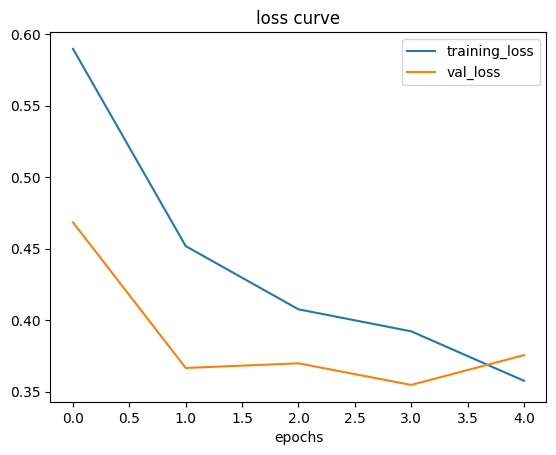

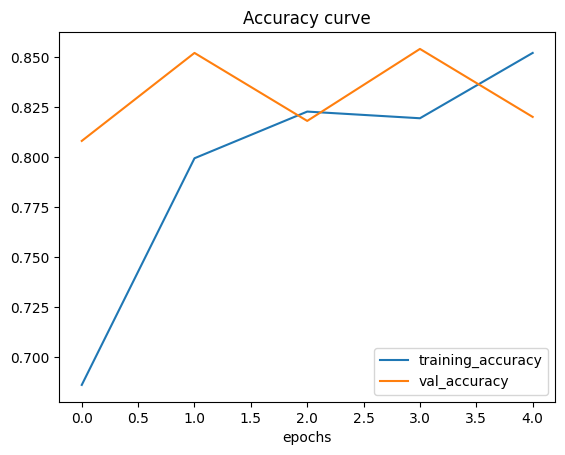

In [ ]:
# plot the loss curve
plot_loss_curve(history_5)

### Opening bag of tricks and finding data augmentation

In [ ]:
# Create ImageGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range=0.2, #how much do u want to rotate an image?
                                             shear_range=0.2, #how much do u want to shear ?
                                             zoom_range=0.2, # zoom in image
                                             width_shift_range=0.2, # move image on xaxis
                                             height_shift_range=0.2, # move image on y axis
                                             horizontal_flip=True) # do u want to flip the imag?

#  create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**Question:** what is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalize(hopefully) patterns. Altering might mean adjusting the rotation of an image, flittping it, cropping it or something similar


In [ ]:
# import data and sugment it from train directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) #for demonstration purposes only


# create non-augmented train data batches
print("Non-Augmented data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)
# create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-Augmented data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data.Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels =train_data_augmented.next()

showing image number: 31


(-0.5, 223.5, 223.5, -0.5)

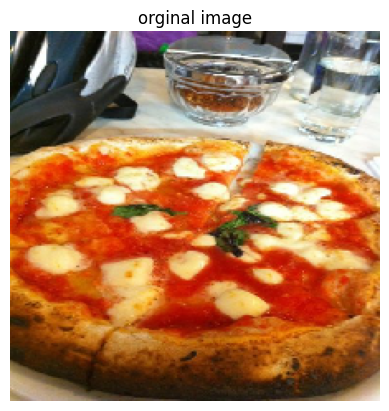

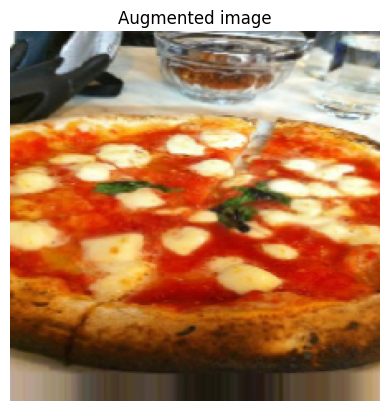

In [ ]:
# show the original image and augmented image
import random
random_number = random.randint(0,32) # batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"orginal image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)


Create model_6 same as model_5 but on augmented data

In [ ]:
# Creating model
model_6 = Sequential([
    Conv2D(10,3, activation ="relu" ),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation ="sigmoid")
])

model_6.compile(
    loss= "binary_crossentropy",
    optimizer = Adam(),
    metrics=["accuracy"]
)

history_6 = model_6.fit(train_data_augmented,
                        steps_per_epoch = len(train_data_augmented),
                        epochs=5,
                        validation_data=(test_data),
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 89s 2s/step - loss: 0.7055 - accuracy: 0.4067 - val_loss: 0.6927 - val_accuracy: 0.5560
Epoch 2/5
47/47 [==============================] - 82s 2s/step - loss: 0.6928 - accuracy: 0.5567 - val_loss: 0.6878 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 85s 2s/step - loss: 0.6949 - accuracy: 0.4400 - val_loss: 0.6931 - val_accuracy: 0.5420
Epoch 4/5
47/47 [==============================] - 78s 2s/step - loss: 0.6933 - accuracy: 0.4607 - val_loss: 0.6926 - val_accuracy: 0.5840
Epoch 5/5
47/47 [==============================] - 74s 2s/step - loss: 0.6928 - accuracy: 0.5207 - val_loss: 0.6906 - val_accuracy: 0.5360


Let's shuffle augmented training data and train another model(same as before) on it and see what happens.

In [ ]:
shuffled_augmented_data = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224, 224),
                                                                      batch_size=32,
                                                                      class_mode="binary",
                                                                      shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# create a model on this data
model_7 = Sequential([
    Conv2D(10, 3 , activation ="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3 , activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_7.compile(
    loss = "binary_crossentropy",
    optimizer= Adam(),
    metrics=["accuracy"]
)

# fitting the model on shuffled augmented data
history_7 = model_7.fit(shuffled_augmented_data, # we're fitting on augmented and shuffled data
            epochs=3,
            steps_per_epoch=len(shuffled_augmented_data),
            validation_data=(test_data),
            validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 505ms/step - loss: 0.6732 - accuracy: 0.5753 - val_loss: 0.6524 - val_accuracy: 0.5740
Epoch 2/5
47/47 [==============================] - 24s 515ms/step - loss: 0.5906 - accuracy: 0.6713 - val_loss: 0.4410 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 24s 515ms/step - loss: 0.4958 - accuracy: 0.7593 - val_loss: 0.3942 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 25s 523ms/step - loss: 0.4991 - accuracy: 0.7467 - val_loss: 0.5252 - val_accuracy: 0.7500
Epoch 5/5
47/47 [==============================] - 24s 519ms/step - loss: 0.4495 - accuracy: 0.8000 - val_loss: 0.3263 - val_accuracy: 0.8820


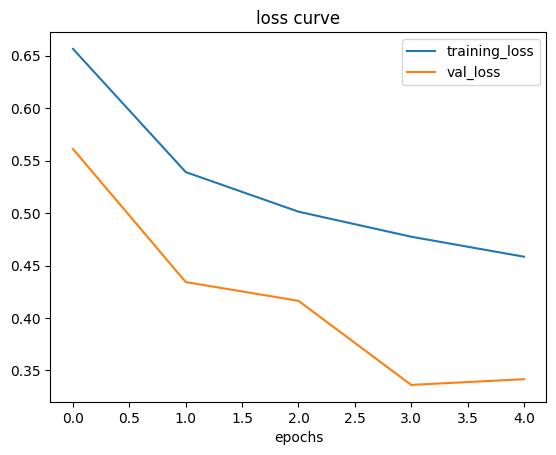

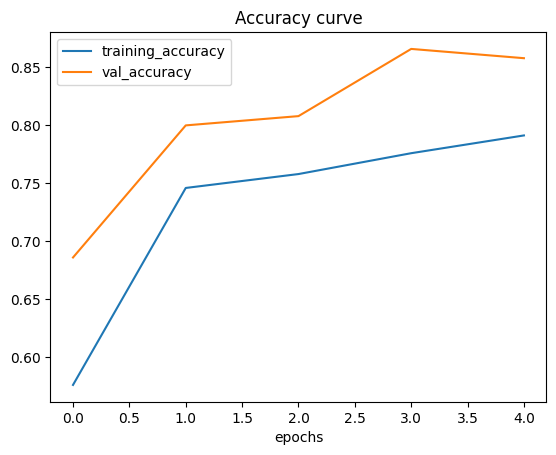

In [ ]:
plot_loss_curve(history_7)

**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images(in our case, pizza & steak at the same time instead of just pizza or steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to  improve our model:

* Increase the number of model layers(e.g. add more `Conv2D/MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer( more epochs)
* Find a ideal learning rate
* Get more data(give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case.

**Practice:** Recreate the model on the CNN explainer website (same as model_1) and see how it performs on the augmented shuffled training data.

In [ ]:
# creating model_8(same as model_1)
model_8 = Sequential([
    Conv2D(32,3, activation="relu", input_shape=(224, 224,3)),
    Conv2D(32, 3, activation ="relu"),
    MaxPool2D(pool_size=2, padding="valid"),
    Conv2D(32, 3, activation="relu"),
    Conv2D(32, 3 , activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_8.compile(
    loss= "binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

history_8 = model_8.fit(shuffled_augmented_data,
                        steps_per_epoch=len(shuffled_augmented_data),
                        validation_data=(test_data),
                        validation_steps=len(test_data),
                        epochs=5)

Epoch 1/5
47/47 [==============================] - 31s 581ms/step - loss: 0.6388 - accuracy: 0.6380 - val_loss: 0.5155 - val_accuracy: 0.7140
Epoch 2/5
47/47 [==============================] - 34s 723ms/step - loss: 0.5087 - accuracy: 0.7547 - val_loss: 0.3837 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 26s 546ms/step - loss: 0.5249 - accuracy: 0.7427 - val_loss: 0.3622 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 25s 540ms/step - loss: 0.4918 - accuracy: 0.7727 - val_loss: 0.3701 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 25s 536ms/step - loss: 0.4604 - accuracy: 0.7920 - val_loss: 0.3152 - val_accuracy: 0.8840


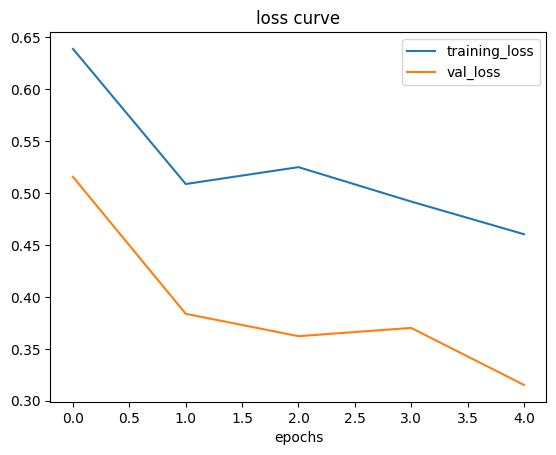

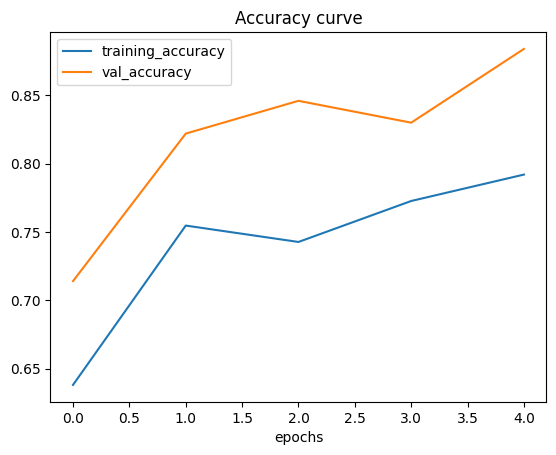

In [ ]:
plot_loss_curve(history_8)

### Making a prediction with our trained model on our custom data


In [ ]:
# classes we're working with
print(class_names)

['pizza' 'steak']


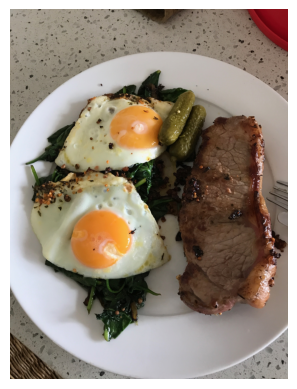

In [ ]:
steak = mpimg.imread("/content/03-steak (1).jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# cheack the shape of image
steak.shape

(4032, 3024, 3)

In [ ]:
import tensorflow as tf
tf.expand_dims(steak, axis=0).shape

TensorShape([1, 4032, 3024, 3])

**Note:** When training a neural network and want to make a prediction with it on your own custom data, it's important than your custom data(or new data) is preprocessed into the same format as the data model was trained on.

In [ ]:
# Create  a function to import and image and resize it to be able to used with our model
import tensorflow as tf
def load_and_prep(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshape it
  to(img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into tensor
  img = tf.image.decode_image(img)
  # resixe the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # rescale the image(get all values between 0 and 1)
  img = img/225.
  return img

In [ ]:
# load in and preproces custom image
steak = load_and_prep("03-steak (1).jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7227778 , 0.705     , 0.6561111 ],
        [0.7372222 , 0.7161111 , 0.66833335],
        [0.7161111 , 0.6894444 , 0.63611114],
        ...,
        [0.5911111 , 0.05777778, 0.10222222],
        [0.5611111 , 0.04777778, 0.08      ],
        [0.5988889 , 0.08777778, 0.11888889]],

       [[0.75      , 0.7322222 , 0.69222224],
        [0.7238889 , 0.70611113, 0.6527778 ],
        [0.74333334, 0.71666664, 0.66333336],
        ...,
        [0.6066667 , 0.07777778, 0.10444444],
        [0.60055554, 0.06722222, 0.10722222],
        [0.5827778 , 0.06277778, 0.09833334]],

       [[0.73888886, 0.7211111 , 0.6677778 ],
        [0.72444445, 0.69555557, 0.6433333 ],
        [0.7438889 , 0.71055555, 0.66055554],
        ...,
        [0.6022222 , 0.07333333, 0.09111111],
        [0.5977778 , 0.07777778, 0.11333334],
        [0.5922222 , 0.05888889, 0.09888889]],

       ...,

       [[0.5588889 , 0.48444444, 0.35166666],
        [0.06

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 190ms/step


array([[0.89795053]], dtype=float32)

In [ ]:
# Remind ourselves of our class names
class_names = class_names.astype('<U9')
class_names

array(['pizza', 'steak'], dtype='<U9')

In [ ]:
# we can index the predicted class by a rounding the prediction probability and indexing it on calss names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filenames, makes a prediction with a model and
  plots the image with the predicted class as the title
  """
  # import the target image and preprocess it
  img = load_and_prep(filename)

  # make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # plot the imaage and predcited class
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False)


1/1 [==============================] - 1s 905ms/step


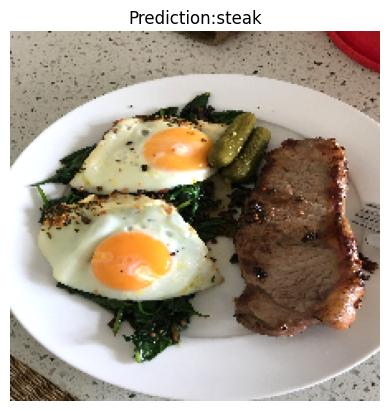

In [ ]:
# test our model on custom image
pred_and_plot(model=model_8, filename = "03-steak (1).jpeg");

1/1 [==============================] - 0s 19ms/step


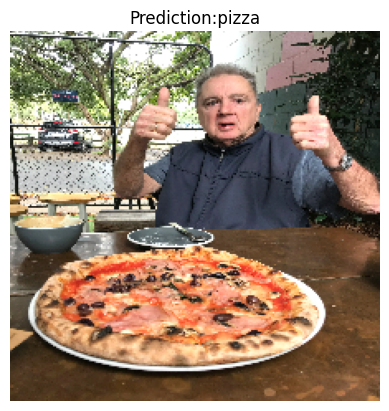

In [ ]:
pred_and_plot(model_7, "03-pizza-dad.jpeg")

## Multi-Class Image Classification

1. Become one with the data
2. Preprocess the data(get it ready for a model)
3. Create a model(start with the baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model(try to beat baseline/reduce overfitting)
7. Repeat until satisfied

### 1. Import and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-06-30 09:38:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.128, 142.250.99.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  51.6MB/s    in 6.7s    

2023-06-30 09:38:13 (73.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# walk through 10 classes of food images data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} image in '{dirpath}'.")

There are 2 directories and 0 image in '10_food_classes_all_data'.
There are 10 directories and 0 image in '10_food_classes_all_data/test'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 image in '10_food_classes_all_data/test/ice_cream'.
There are 10 directori

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# lets get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [ ]:
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


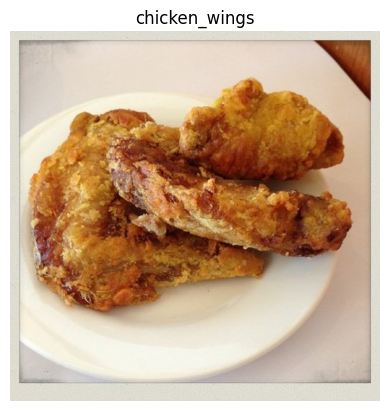

In [ ]:
# visualize , visualize, visualize
import random
img =  view_random_image(target_dir=train_dir,
                         target_class=random.choice(class_names))


### 2. Preprocess to data

In [ ]:
# define directory path
train_directory = "10_food_classes_all_data/train/"
test_directory = "10_food_classes_all_data/test/"

In [ ]:
# create a instance for data generator
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# load the image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_directory,
                                               target_size = (224,224),
                                               class_mode="categorical",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory = test_directory,
                                             target_size = (224,224),
                                             class_mode= "categorical",
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# no.of batches
len(train_data)

235

In [ ]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
images[0].shape

(224, 224, 3)

### Create a model(start with the baseline) and fit the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
model_9 = Sequential([
    Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(pool_size=10),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(
    loss= tf.keras.losses.CategoricalCrossentropy(),
    optimizer = Adam(),
    metrics = ["accuracy"]
)

history_9 = model_9.fit(train_data,
            steps_per_epoch = len(train_data),
            validation_data=(test_data),
            epochs=10,
            validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 73s 258ms/step - loss: 2.1997 - accuracy: 0.1737 - val_loss: 2.0739 - val_accuracy: 0.2560
Epoch 2/10
235/235 [==============================] - 58s 247ms/step - loss: 2.0089 - accuracy: 0.2773 - val_loss: 1.9398 - val_accuracy: 0.3208
Epoch 3/10
235/235 [==============================] - 71s 302ms/step - loss: 1.8604 - accuracy: 0.3499 - val_loss: 1.8264 - val_accuracy: 0.3520
Epoch 4/10
235/235 [==============================] - 73s 311ms/step - loss: 1.7774 - accuracy: 0.3809 - val_loss: 1.8286 - val_accuracy: 0.3700
Epoch 5/10
235/235 [==============================] - 72s 305ms/step - loss: 1.7181 - accuracy: 0.4125 - val_loss: 1.8102 - val_accuracy: 0.3556
Epoch 6/10
235/235 [==============================] - 61s 260ms/step - loss: 1.6506 - accuracy: 0.4372 - val_loss: 1.7388 - val_accuracy: 0.3956
Epoch 7/10
235/235 [==============================] - 62s 263ms/step - loss: 1.6037 - accuracy: 0.4555 - val_loss: 1.7585 - val_ac

### 5. Evaluate the model

In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 12s 157ms/step - loss: 1.7351 - accuracy: 0.4008


[1.7350736856460571, 0.4007999897003174]

In [ ]:
plot_loss_curve(history_9)

NameError: ignored

### 6. Adjust the model hyperparameters(to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

so, let's try and fix Overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simpify the model** - if our current model is overfitting the data, it may be too complicated, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use Data Augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it(without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

Let's create a model same as before but with reducing 2 layers

In [ ]:
model_10  = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

model_10.compile(
    loss="categorical_crossentropy",
    optimizer= Adam(),
    metrics=["accuracy"]
)

history_10 = model_10.fit(
    train_data,
    steps_per_epoch = len(train_data) ,
    epochs=10,
    validation_data =(test_data),
    validation_steps= len(test_data)
    )

Looks like our "simplyfying the model" experiment didn't work and overfitting continued...
let's try data augmentation

### Trying to reduce overfitting with data augmentation

Ideally, we want to:
  * Reduce overfitting(get the train and validation loss curves closer)
  * Improve validation accuracy

In [ ]:
# new imagedatagenerator instance for data augmentation
train_augmented_datagen = ImageDataGenerator(rescale=1/255.,
                                         rotation_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.3,
                                         horizontal_flip = True,
                                         zoom_range=0.2, # zoom in image
                                         )
augmented_train_data = train_augmented_datagen.flow_from_directory(directory = train_directory,
                                               target_size= (224,224),
                                               class_mode="categorical",
                                               batch_size=32,
                                               )

# load the image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_directory,
                                               target_size = (224,224),
                                               class_mode="categorical",
                                               batch_size=32,
                                               )

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.


In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels =augmented_train_data.next()

showing image number: 10


(-0.5, 223.5, 223.5, -0.5)

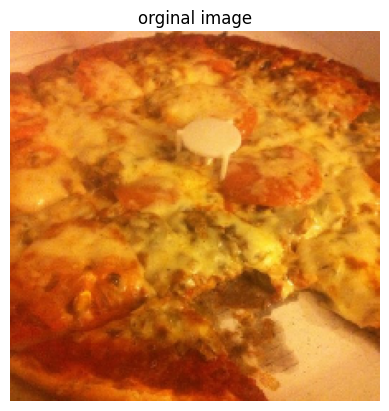

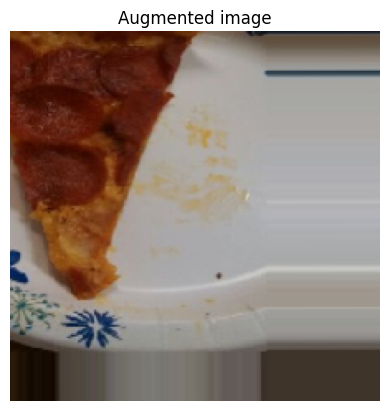

In [ ]:
# show the original image and augmented image
import random
random_number = random.randint(0,32) # batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"orginal image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)


In [ ]:
# lets create another model but this time on the augmented data
model_11 = tf.keras.models.clone_model(model_9)

# compile the model
model_11.compile(
    loss="categorical_crossentropy",
    optimizer = Adam(),
    metrics=["accuracy"]
)

# fit the model
history_11 = model_11.fit(
    augmented_train_data,
    epochs=10,
    steps_per_epoch = len(augmented_train_data),
    validation_data = (test_data),
    validation_steps= len(test_data)

)

Epoch 1/10
235/235 [==============================] - 127s 530ms/step - loss: 2.2294 - accuracy: 0.1695 - val_loss: 2.0833 - val_accuracy: 0.2584
Epoch 2/10
235/235 [==============================] - 126s 536ms/step - loss: 2.1161 - accuracy: 0.2431 - val_loss: 2.0066 - val_accuracy: 0.2812
Epoch 3/10
235/235 [==============================] - 134s 569ms/step - loss: 2.0346 - accuracy: 0.2812 - val_loss: 1.9121 - val_accuracy: 0.3264
Epoch 4/10
235/235 [==============================] - 125s 531ms/step - loss: 1.9871 - accuracy: 0.3045 - val_loss: 1.8320 - val_accuracy: 0.3680
Epoch 5/10
235/235 [==============================] - 126s 537ms/step - loss: 1.9410 - accuracy: 0.3115 - val_loss: 1.8007 - val_accuracy: 0.3776
Epoch 6/10
235/235 [==============================] - 125s 534ms/step - loss: 1.9198 - accuracy: 0.3341 - val_loss: 1.8019 - val_accuracy: 0.3696
Epoch 7/10
235/235 [==============================] - 135s 574ms/step - loss: 1.8945 - accuracy: 0.3324 - val_loss: 1.7288 -

In [ ]:
model_11.evaluate(test_data)

79/79 [==============================] - 15s 185ms/step - loss: 1.7877 - accuracy: 0.3784


[1.7876951694488525, 0.3783999979496002]

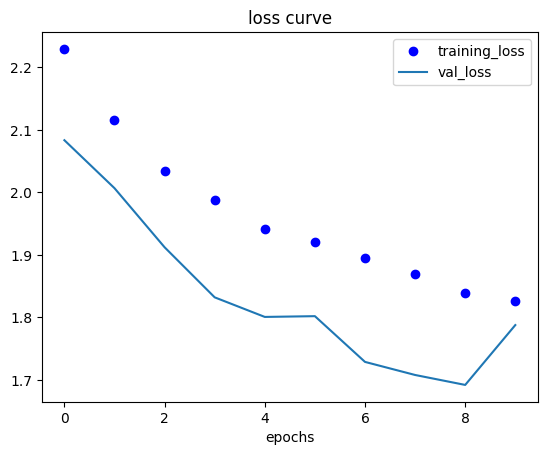

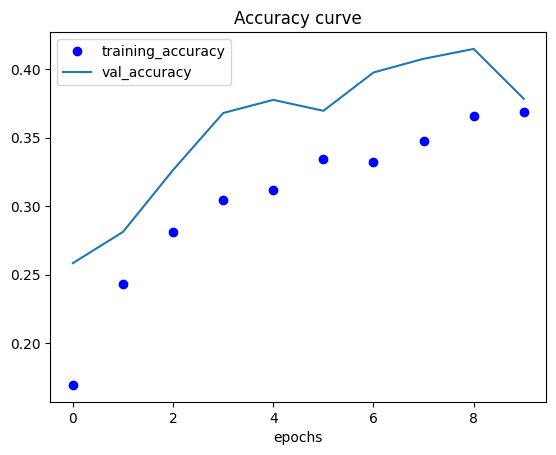

In [ ]:
plot_loss_curve(history_11)

### 7. Repeat until satisfied
We could keep going here.. continually trying to bring our loss curves together and trying to improve the validation/test accuracy.
How ?
By running lots of experiments, namely:
 * restructuring our model's architecture(increasing layers/hidden units)
 * adjust the learning rate
 * try different methods of data augmentation(adjust the hyperparameters in our ImageDataGenerator instance)
 * training for longer(e.g. 10 epochs instead of 5 epochs)
 * try **transfer learning**

In [ ]:
# Remind ourselves of the classes
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Reconfig pred and plot function

In [ ]:
import matplotlib.pyplot as plt


def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filenames, makes a prediction with a model and
  plots the image with the predicted class as the title
  """
  # import the target image and preprocess it
  img = load_and_prep(filename)

  # make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # add logic for multi-class
  if len(pred[0]) >1:
    pred_class =class_names[tf.argmax(pred[0])]
  else:
    # get the predicted class
    pred_class = class_names[int(tf.round(pred[0]))]

  # get the predicted class
  # pred_class = class_names[int(tf.round(pred))]

  # plot the imaage and predcited class
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 20ms/step


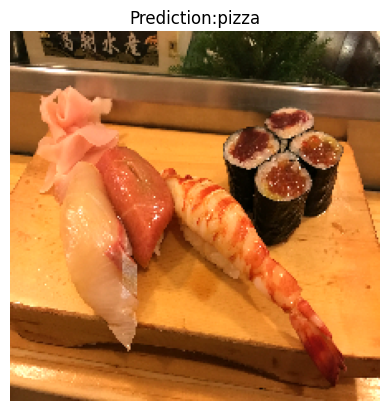

In [ ]:
# make a prediction using model_9
pred_and_plot(model=model_9,
              filename="03-sushi.jpeg",
              class_names= class_names)

1/1 [==============================] - 0s 21ms/step


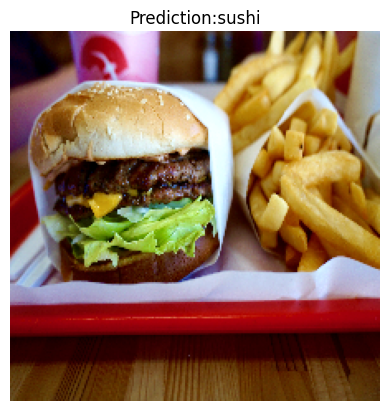

In [ ]:
pred_and_plot(model=model_9,
              filename="03-hamburger.jpeg",
              class_names= class_names)

1/1 [==============================] - 0s 20ms/step


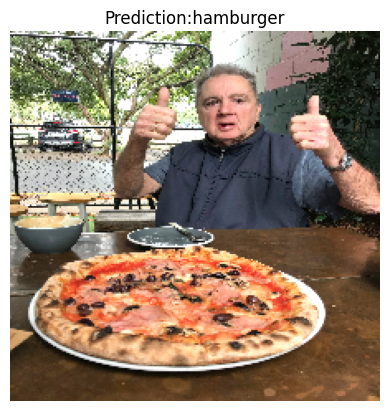

In [ ]:
pred_and_plot(model=model_9,
              filename="03-pizza-dad (1).jpeg",
              class_names= class_names)

1/1 [==============================] - 0s 18ms/step


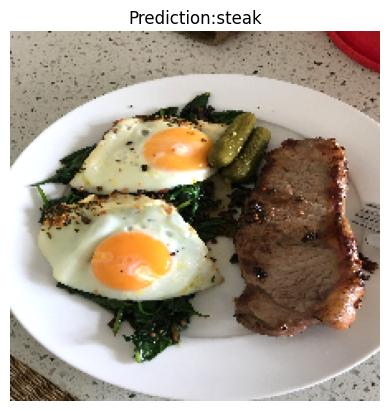

In [ ]:
pred_and_plot(model=model_9,
              filename="/content/03-steak (2).jpeg",
              class_names= class_names)

### Saving and loading our model

In [ ]:
# save a model
model_9.save("saved_model_9")

In [ ]:
# load in a trained model and evaluate
loaded_model_9 = tf.keras.models.load_model("saved_model_9")
loaded_model_9.evaluate(test_data)

79/79 [==============================] - 18s 230ms/step - loss: 1.7351 - accuracy: 0.4008


[1.735073208808899, 0.4007999897003174]

In [ ]:
# compare our model 9 to it
model_9.evaluate(test_data)

79/79 [==============================] - 13s 164ms/step - loss: 1.7351 - accuracy: 0.4008


[1.735073208808899, 0.4007999897003174]